In [2]:
#Dima Oana-Teodora 241
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import csv
from sklearn.utils import shuffle
from sklearn import metrics


In [3]:
# citire imagini de antrenare plus etichete de antrenare
f = open ("train.txt") # deschidere fisier
train_images = []
train_labels = []
for line in enumerate(open("train.txt", "r")):
    v = line[1].split(',') # citire linie din fisier
    image_name = 'train/'+v[0] # formare cale catre folderul cu imagini
    label = int(v[1]) # transformare numar clasa din string in int
    train_labels.append(label) # adaugare clasa 
    image = plt.imread(image_name) # citire imagine matrice 32 X 32
    train_images.append(image) # adaugare imagine
# transformare in numpy arrays
train_images = np.expand_dims(train_images, axis=3) #redimensionare (30001, 32, 32) => (30001, 32, 32, 1)
train_labels = np.array(train_labels) 

train_images, train_labels = shuffle(train_images, train_labels) # amestecare

In [4]:
# citire imagini de testare 
f = open ("test.txt")
test_images = []
name_test_images =[]
for line in enumerate(open("test.txt", "r")):
    image_name = 'test/'+ line[1][:len(line[1])-1] # formare cale director cu imagini 
                                                    #(+ sterg caracterul '\n' de la final, altfel => erooare)
    name_test_images.append(line[1][:len(line[1])-1])
    image = plt.imread(image_name)
    test_images.append(image)
    
test_images = np.expand_dims(test_images, axis=3)

In [5]:
# citire imagini de validare plus etichete de validare
f = open ("validation.txt")
validation_images = []
validation_labels = []
for line in enumerate(open("validation.txt", "r")):
    v = line[1].split(',')
    image_name = 'validation/'+v[0]
    label = int(v[1])
    validation_labels.append(label)
    image = plt.imread(image_name)
    validation_images.append(image)

validation_images = np.expand_dims(validation_images, axis=3)
validation_labels = np.array(validation_labels)

validation_images, validation_labels = shuffle(validation_images, validation_labels)

In [6]:
classes = 9 # 9 categorii notate de la 0 la 8

y_val=np_utils.to_categorical(validation_labels, classes) 
y_train=np_utils.to_categorical(train_labels, classes) 


In [7]:
# API de tip secvential 
model = keras.Sequential()
# ------------------------------Feature extraction part----------------------
# 32 filtre din care va invata
# marime kernel (3,3) => matrice 3 x 3
# 'relu' functia de activare care va fi aplicata dupa convolutie
# input_shape ii spun modelului ce tip de date am 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
# in functia de max pooling -> matrice de 2 x 2 
model.add(layers.MaxPooling2D((2, 2)))
# 64 filtre din care va invata
# marime kernel (3,3) => matrice 3 x 3
# 'relu' functia de activare care va fi aplicata dupa convolutie
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# in functia de max pooling -> matrice de 2 x 2 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
#---------------------------------Clasification part--------------------------------------
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(classes, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               5

In [8]:
# configurare model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# antrenare model
history = model.fit(train_images, y_train, batch_size=64, epochs=25, verbose=1, validation_data=(validation_images, y_val))
# evaluare model
loss_accuracy = model.evaluate(validation_images, y_val)
print(loss_accuracy)

Epoch 1/25
469/469 [==============================] - 26s 52ms/step - loss: 1.3883 - accuracy: 0.4952 - val_loss: 0.7014 - val_accuracy: 0.7538
Epoch 2/25
469/469 [==============================] - 25s 52ms/step - loss: 0.6331 - accuracy: 0.7753 - val_loss: 0.5475 - val_accuracy: 0.8032
Epoch 3/25
469/469 [==============================] - 24s 50ms/step - loss: 0.4632 - accuracy: 0.8363 - val_loss: 0.4833 - val_accuracy: 0.8292
Epoch 4/25
469/469 [==============================] - 23s 50ms/step - loss: 0.3781 - accuracy: 0.8687 - val_loss: 0.4559 - val_accuracy: 0.8414
Epoch 5/25
469/469 [==============================] - 29s 61ms/step - loss: 0.3041 - accuracy: 0.8917 - val_loss: 0.4479 - val_accuracy: 0.8498
Epoch 6/25
469/469 [==============================] - 32s 69ms/step - loss: 0.2508 - accuracy: 0.9111 - val_loss: 0.5048 - val_accuracy: 0.8284
Epoch 7/25
469/469 [==============================] - 32s 69ms/step - loss: 0.2123 - accuracy: 0.9252 - val_loss: 0.4761 - val_accuracy:

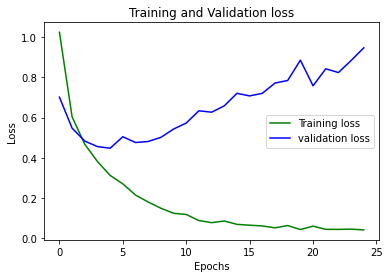

In [9]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(25)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

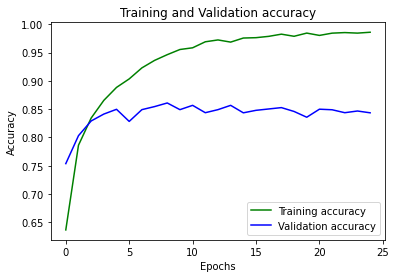

In [10]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(25)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
# prezic clasele pe imaginile de validare
y_pred=model.predict_classes(validation_images).astype("int32")
# calcul matrice de confuzie
confusion_matrix=metrics.confusion_matrix(validation_labels, y_pred, labels=[0,1,2,3,4,5,6,7,8])
#print(confusion_matrix)

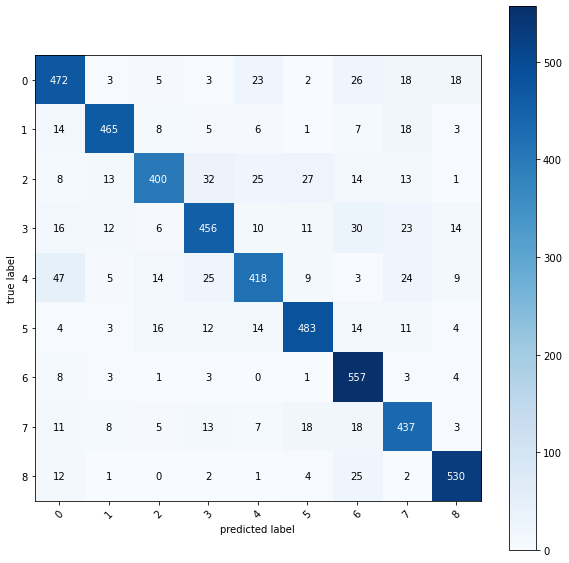

In [12]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(confusion_matrix, colorbar=True, 
                      class_names=[0,1,2,3,4,5,6,7,8], 
                      figsize=(10, 10))
plt.show()

In [13]:
# prezicere
predict = model.predict_classes(test_images).astype("int32")

# scriere in fisier 
f = open("submission_9.csv", "w", newline="")
csv_file= csv.writer(f, delimiter=",") #stabilire delimitatori cuvinte
csv_file.writerow(['id', 'label']) # capul de tabel
for i in range (predict.shape[0]):
    csv_file.writerow([name_test_images[i], predict[i]])
f.close()